# Visualizando distribuições de dados

Uma parte importante da análise exploratória de dados é identificar as distribuições dos dados disponíveis.

Diferentes tipos de visualização podem ser utilizadas em função do tipo de dado que se quer analisar.

## Visualizando dados discretos

Distribuições de dados discretos costumam ser analisadas a partir de contagens de frequência dos valores possíveis.

O exemplo mais direto são os **histogramas**, que já vimos anteriormente. 

Como discutimos, histogramas são úteis principalmente quando a característica em análise apresenta poucos valores possíveis.

Esse não costuma ser o caso quando desejamos analisar os termos mais frequentes em documentos, por exemplo.

Uma opção mais interessante neste caso são as **nuvens de palavras** (em inglês, *word clouds*).

Em uma nuvem de palavras, os termos que são mais frequentes aparecem em destaque (posições mais centrais e em tamanho maior). 

Em Python, podemos usar a biblioteca `wordcloud` em conjunto com a biblioteca `matplotlib` para gerar uma nuvem de palavras:

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Uma nuvem de palavras simples

Vamos começar usando um exemplo artificial para focarmos no uso das bibliotecas:

In [0]:
texto="Natal Calor Sol Quente Calor Praia IMD IMD Calor Natal Tecnologia Digital Tecnologia Praia Praia Sol Verão Verão Verão Calor Calor Quente Quente Quente Quente IMD Sol Sol Calor Calor Calor Calor Digital IMD Verão Praia Praia Litoral Litoral Praia Calor Sol IMD Quente Vulcão"

A nuvem de palavras é criada em duas etapas. 

Primeiro, usamos o método `WordCloud` da biblioteca `wordcloud`, que nos permite passar parâmetros como a altura, largura e cor de fundo.

In [0]:
wordcloud = WordCloud(width=550, height=550, background_color="white").generate(texto)

Em seguida, usamos o método `imshow` da bibloteca `matplotlib` para visualizar a nuvem produzida. 

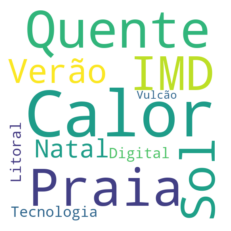

In [34]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Alguns pequenos detalhes técnicos do código acima: 
- Para ter uma melhor qualidade na imagem produzida, usamos como parâmetro um método de interpolação bilinear:
```python
plt.imshow(wordcloud, interpolation='bilinear')
```
- Como o `matplotlib` é geralmente usado para gerar gráficos matemáticos, precisamos especificar que não queremos que sejam gerados eixos para nossa nuvem de palavra:
```python
plt.axis("off")
```
- A renderização final é feita com o método `show` da biblioteca `matplotlib`:
```python
plt.show()
```


### Uma nuvem de palavras no mundo real

Em termos de bibliotecas e métodos, o exemplo acima é muito próximo do que usamos no dia a dia da análise de documentos.

No entanto, com textos reais, é necessário atentarmos para os conceito de **stopwords** e **corpus**.

Vamos ver um exemplo que ilustra isso, extraído da introdução da página da Wikipedia sobre Natal-RN:

In [0]:
texto="""
        Natal é um município brasileiro, capital do estado do Rio Grande do Norte, na Região Nordeste do país. Com uma área de aproximadamente 167 km², é a segunda capital brasileira com a menor área territorial e a sexta maior capital do país em densidade populacional, distando 2 227 quilômetros de Brasília, a capital federal.
        Fundada em 1599, às margens do Rio Potenji, conta com importantes monumentos, parques e museus e pontos turísticos, como o Teatro Alberto Maranhão e a Coluna Capitolina Del Pretti, no Centro Histórico, além de outras atrações, entre elas a Ponte Newton Navarro, o Museu Câmara Cascudo, o Parque da Cidade Dom Nivaldo Monte, o Museu de Cultura Popular, o Parque das Dunas, a Catedral Metropolitana e praias como Ponta Negra e dos Artistas, e eventos de grande repercussão, tais como a Feira Internacional de Artesanato (FIART), o Carnatal, as festas juninas e as comemorações natalinas.
        Historicamente, a cidade teve grande importância durante a Segunda Guerra Mundial em 1942 durante a Operação Tocha, já que os aviões da base aliada americana se abasteciam com combustível no lugar onde durante muito tempo foi o Aeroporto Internacional Augusto Severo, sendo classificada como "um dos quatro pontos mais estratégicos do mundo". Devido às operações da primeira base de foguetes da América do Sul, no Centro de Lançamento da Barreira do Inferno, hoje localizada no município limítrofe de Parnamirim, Natal também passou a ser conhecida como a "Capital Espacial do Brasil". A capital potiguar foi também uma das doze sedes da Copa do Mundo de 2014.
        De acordo com a estimativa realizada pelo Instituto Brasileiro de Geografia e Estatística (IBGE) em 2018, a população do município é de 877 640 habitantes, sendo o décimo nono município mais populoso do país e sua região metropolitana, formada por outros treze municípios do Rio Grande do Norte, possui uma população de pouco mais de 1,5 milhão de habitantes, formando a quinta maior aglomeração urbana do Nordeste e a décima nona do Brasil.
        """

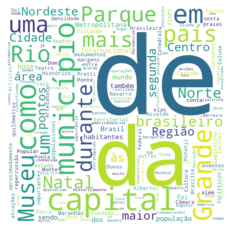

In [37]:
wordcloud = WordCloud(width=550, height=550, background_color="white").generate(texto)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Em textos reais, é bem comum que os termos mais frequentes sejam termos pouco relevantes, como artigos e preposições.

No campo de **processamento de linguagem natural** (NLP), esses termos são conhecidos como *stopwords*.

Em geral, stopwords são fornecidas por bibliotecas de NLP como parte de um *corpus*, isto é, uma base de dados em um determinado idioma construída a partir de uma coleção de documentos.

Em Python, as principais bibliotecas de NLP são a `nltk` e a `spacy`. Vamos ver a seguir um exemplo usando a biblioteca `nltk`, onde começamos baixando a coleção de stopwords da biblioteca:

In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Uma vez baixada a coleção de stopwords, podemos selecionar apenas as para o português, idioma do texto da Wikipedia sobre Natal-RN:

In [0]:
from nltk.corpus import stopwords
stopwords_pt = stopwords.words("portuguese")

Agora podemos gerar nossa nuvem de palavras como fizemos anteriormente, adicionando apenas o parâmetro `stopwords` ao método `WordCloud`:

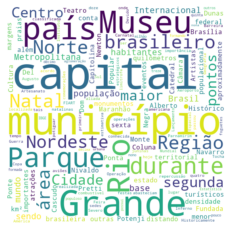

In [46]:
wordcloud = WordCloud(width=550, height=550, background_color="white", stopwords=stopwords_pt).generate(texto)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Em destaque, vemos os termos que de fato melhor identificam Natal-RN no texto da Wikipedia.

Note que alguns termos aparecem separados, como Rio Grande do Norte e Região Nordeste. Esse tipo de análise requer o uso de n-gramas, que você pode pesquisar em tutoriais sobre a `nltk` =)

## Visualizando dados contínuos

Quando desejamos analisar dados contínuos, podemos:
- usar representações que aplicam uma discretização aos dados
- usar representações próprias para dados contínuos

O principal exemplo de visualização discretizada é o histograma, como já vimos anteriormente.

Já para visualização contínua, podemos usar gráficos de densidade, que também já discutimos.

Seja qual for o tipo de visualização adotada, o essencial é conseguir identificar o tipo de distribuição apresentada e como proceder em cada caso.

### Principais tipos de distribuição

Em notebooks anteriores, discutimos rapidamente sobre as distribuições normal e bimodal.

Aqui, vamos discutir rapidamente sobre outros dois tipos de distribuição que são comuns, a **uniforme** e a **exponencial**.

#### Distribuição Uniforme

Nesta distribuição, todos os valores possíveis para um dado têm iguais chances de ocorrer.

In [0]:
import pandas as pd
import seaborn as sns

(1, 2)

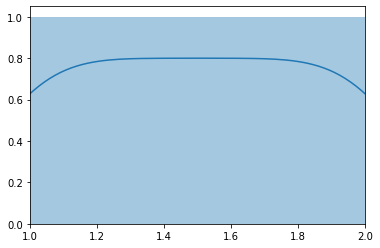

In [52]:
s = pd.Series([1,1.25,1.5,1.75,2,1,1.25,1.5,1.75,2,1,1.25,1.5,1.75,2,1,1.25,1.5,1.75,2,1,1.25,1.5,1.75,2,1,1.25,1.5,1.75,2,1,1.25,1.5,1.75,2,1,1.25,1.5,1.75,2,1,1.25,1.5,1.75,2,1,1.25,1.5,1.75,2])
ax = sns.distplot(s, bins=5)
plt.xlim(1,2)

### Curvas de Nível

Nesse tipo de visualização cada curva representa um determinado valor da amostra.

In [0]:
import matplotlib.pylab as pl

In [0]:
import numpy as np
z = np.random.random((10,10))

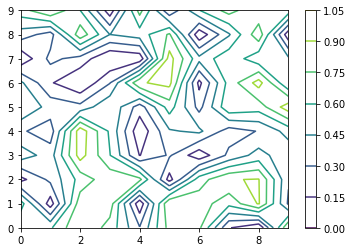

In [27]:
pl.figure()
pl.contour(z)
pl.colorbar()
pl.show()

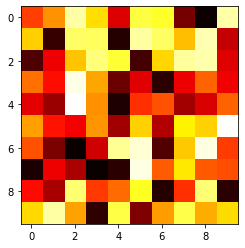

In [29]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap='hot', interpolation='nearest')
plt.show()

### Gráfico de Densidade

O gráfico de densidade mostra qual é a distribuição dos dados de um determinado conjunto, é uma forma de se entender rapidamente como os valores se comportam. No exemplo abaixo os valores são criados aleatoriamente (de novo), mas podem ser substituídos por qualquer conjunto de valores que queira.

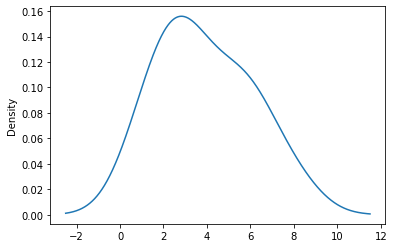

In [5]:
import pandas as pd

s = pd.Series([1, 1.1, 2.3, 2.4, 2.5, 3, 3.5, 4, 5, 5.5, 6.2, 6.3, 8])
ax = s.plot.kde()

Do gráfico acima podemos concluir que a maior parte dos valores se concentram entre 2 e 4, e ao longo do desenho essa frequência vai diminuindo. Em algumas ocasiões pode ser interessante plotar dois gráficos diferentes na mesma figura, isso é possível com o Pandas, a seguir um exemplo ilustra isso.

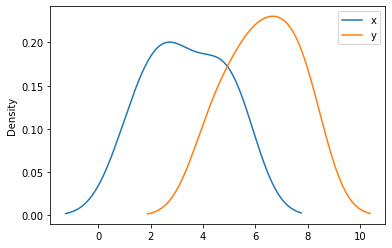

In [6]:
df = pd.DataFrame({
    'x': [1, 1.5, 2, 2.5, 2.5, 3, 3.5, 4, 4.5, 5, 5.2, 5.5],
    'y': [4, 4.5, 5, 5.5, 6, 6, 6.5, 7, 7.2, 7.5, 8, 8.25],
    })
ax = df.plot.kde()

### Mapa de Calor

No mapa de calor as cores têm um papel fundamental no entendimento dos dados, normalmente cores mais frias (azul, preto, cinza) representam dados que aparecem com menos frequência, já as cores quentes (vermelho, larajna, amarelo) nos apontam dados que aparecem mais, a seguir é mostrado um exemplo. No exemplo abaixo é mostrado, com valores fictícios, a quantidade de alunos que se formaram ao longo dos anos em diferentes cursos da UFRN.

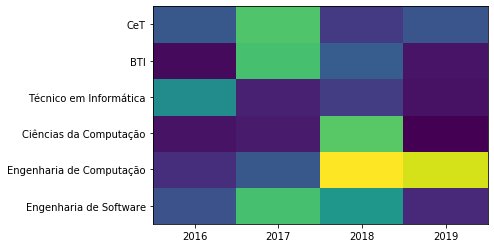

In [0]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt

Index= ['Engenharia de Software', 'Engenharia de Computação', 'Ciências da Computação', 'Técnico em Informática', 'BTI', 'CeT']
Cols = ['2016', '2017', '2018', '2019']
df = DataFrame(abs(np.random.randn(6, 4)), index=Index, columns=Cols)

plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.show()

## Distribuições Discretas

A distribuição discreta descreve a probabilidade de ocorrência de valores de uma variável aleatória discreta, uma variável desse tipo possui valores contáveis, como uma lista de inteiros, a quantidade de meses num ano, a quantidade de alunos numa escola, a quantidade de objetos numa lista, etc. Dessa forma, cada valor possível da variável pode ser associado a uma probabilidade diferente de zero.

#### Distribuição Normal

Na probabilidade a distribuição normal (ou Gaussiana) é um caso comum de distribuição de probabilidade contínua. É observada com bastante frequência na natureza e nas ciências sociais, representando variáveis aleatórias reais.

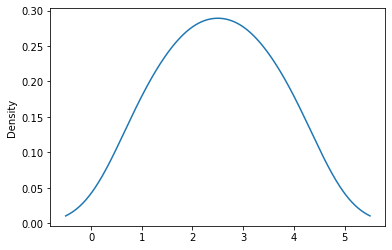

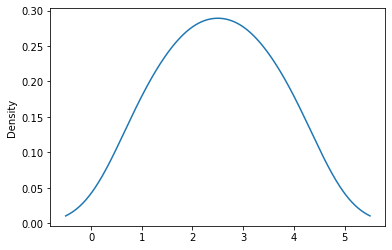

In [0]:
import pandas as pd

s = pd.Series([1,1,2,2,2,3,3,3,4,4])
ax = s.plot.kde()

É possível observar na figura acima que a distribuição é perfeita, não há deslocamento da curva pra nenhum dos lados, e isso representa bem o comportamento dos dados que foram plotados. Na natureza esse comportamento também é observado, é claro que existem desvios pra esquerda ou direita, mas na maioria dos casos esses desvios são mínimos e a distribuição dos dados pode ser analisada como uma distribuição normal (ou Gaussiana).

### Distribuição Bimodal

Essa distribuição é semelhante a que foi apresentada anteriormente, porém apresenta dois "picos", e isso mostra que os dados possui uma distribuição que tem dois agrupamentos diferentes de valores. Abaixo as bibliotecas serão carregadas, e em seguida o conjunto de dados será carregado.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [0]:
dados_url = 'http://bit.ly/2cLzoxH'
dados = pd.read_csv(dados_url)
dados.head(n=10)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
5,Afghanistan,1977,14880372.0,Asia,38.438,786.113360
6,Afghanistan,1982,12881816.0,Asia,39.854,978.011439
7,Afghanistan,1987,13867957.0,Asia,40.822,852.395945
8,Afghanistan,1992,16317921.0,Asia,41.674,649.341395
9,Afghanistan,1997,22227415.0,Asia,41.763,635.341351


(22.0, 90.0)

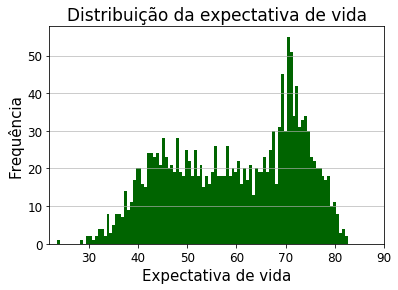

In [0]:
dados['lifeExp'].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12, 
                     color = 'darkgreen')
plt.title("Distribuição da expectativa de vida", fontsize = 17)
plt.xlabel("Expectativa de vida", fontsize=15)
plt.ylabel("Frequência",fontsize=15)
plt.grid(axis = 'y', alpha = 0.8)
plt.xlim([22.0,90.0])

O gráfico acima já foi mostrado num tutorial anterior, porém é muito relevante, pois apresenta duas concentrações de dados em torno dos 40 (anos) aproximadamente e outra próxima aos 70 (anos). Existem interpretações que podem ser feitas olhando apenas um gráfico, no exemplo mostrado os dados são de expectativa de vida em diferentes continentes, então uma possível interpretação da dupla concentração de valores seria a diferença de qualidade de vida entre os mais ricos e mais pobres no mundo.